In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from tqdm import tqdm
from collections import Counter
from pathlib import Path
import time

from PIL import Image
import numpy as np
import pandas as pd

# !pip install funcyou -q
from funcyou.utils import DotDict, dir_walk
from funcyou.dataset import download_kaggle_resource

In [7]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'

model_name = 'vit'

if model_name=='vitres':
    model_path = Path('models/vitres.pth')

elif model_name=='vit':
    model_path = Path('models/vit1.pth')
elif model_name=='res':
    model_path = Path('models/res.pth')

In [8]:
model_path


WindowsPath('models/vit1.pth')

In [9]:
model_path.parent.mkdir(exist_ok=True)


In [10]:
# Create a DotDict instance and initialize it with your configuration
config = DotDict()
config.num_layers = 4
config.resnet_layers = 2

config.hidden_dim = 120  # should be mutiple of num_heads
config.mlp_dim = 2048
config.num_heads = 12
config.dropout_rate = 0.1
config.image_size = 512  # should be mutiple of patch_size
config.patch_size = 32   # should be mutiple of 8
config.num_patches = int(config.image_size**2 / config.patch_size**2)
config.num_channels = 3
config.patching_elements = (config.num_channels*config.image_size**2 )//config.num_patches
config.final_resnet_output_dim = 2048
config.num_classes = 2
config.batch_size = 8
config.device = device

In [12]:
config.num_heads*10


120

In [22]:
data_dir = Path("Data/chest_xray")


In [23]:
list(data_dir.iterdir())


[WindowsPath('Data/chest_xray/chest_xray'),
 WindowsPath('Data/chest_xray/test'),
 WindowsPath('Data/chest_xray/train'),
 WindowsPath('Data/chest_xray/val'),
 WindowsPath('Data/chest_xray/__MACOSX')]

In [24]:
train_dir = data_dir/'train'
test_dir = data_dir/'test'
val_dir = data_dir/'val'

In [25]:
dir_walk(train_dir)


,directory,base,folders,video,music,photos,application/zip,documents,others,total files
0,Data\chest_xray\train,train,2,0,0,0,0,0,0,0
1,Data\chest_xray\train\NORMAL,NORMAL,0,0,0,1341,0,0,0,1341
2,Data\chest_xray\train\PNEUMONIA,PNEUMONIA,0,0,0,3875,0,0,0,3875


In [26]:
dir_walk(test_dir)


,directory,base,folders,video,music,photos,application/zip,documents,others,total files
0,Data\chest_xray\test,test,2,0,0,0,0,0,0,0
1,Data\chest_xray\test\NORMAL,NORMAL,0,0,0,234,0,0,0,234
2,Data\chest_xray\test\PNEUMONIA,PNEUMONIA,0,0,0,390,0,0,0,390


In [27]:
dir_walk(val_dir)


,directory,base,folders,video,music,photos,application/zip,documents,others,total files
0,Data\chest_xray\val,val,2,0,0,0,0,0,0,0
1,Data\chest_xray\val\NORMAL,NORMAL,0,0,0,8,0,0,0,8
2,Data\chest_xray\val\PNEUMONIA,PNEUMONIA,0,0,0,8,0,0,0,8


In [28]:
# Define data augmentation transformations for X-ray images
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=(-20, 20)),  # Random rotation between -10 and 10 degrees
    transforms.RandomHorizontalFlip(),            # Random horizontal flip
    transforms.RandomVerticalFlip(),            # Random vertical flip
    transforms.RandomResizedCrop(config.image_size, scale=(0.7, 1.3)),  # Randomly resize and crop to 224x224 pixels
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Adjust brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Convert to tensor
   ])

In [ ]:
                                                                # from scratch

In [1]:
import torch

In [2]:
torch.__version__

'2.5.0.dev20240805+cu118'

In [3]:
import matplotlib.pyplot as plt
from torch import nn
import torchvision
from torchvision import transforms

In [4]:
device = 'cuda' if torch.cuda.is_available() else "gpu"

In [5]:
device

'cuda'

In [6]:
train_dir = "C:/Users/R NITHAN/Downloads/S7_Pro/Project/Data/chest_xray/train"
test_dir =  "C:/Users/R NITHAN/Downloads/S7_Pro/Project/Data/chest_xray/test"

In [7]:
# creating datasets and dataloaders

import os
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataLoaders( 
    train_dir : str,
    test_dir:str,
    transform : transforms.Compose,
    batch_size : int,
    num_workers : int = NUM_WORKERS):

    # use image folder to create dataFolders
    train_data = datasets.ImageFolder(train_dir,transform=transform)
    test_data = datasets.ImageFolder(test_dir,transform=transform)

    # class names gathering
    class_names = train_data.classes

    # Turn train and test data to image loaders

    train_dataloader = DataLoader(
        train_data,
        shuffle=True,
        pin_memory=True,
        batch_size=batch_size,
        num_workers=num_workers)
    test_dataloader = DataLoader(
        test_dir,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
        batch_size=batch_size)

    return train_dataloader,test_dataloader,class_names
       
    
    

In [8]:
# IMAGE size
IMG_SIZE = 224

# create transform pipeline manually

transform_manually = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor()
])

transform_manually

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

In [9]:
BATCH_SIZE = 32

# create dataloaders

train_dataloader,test_dataloader,class_names = create_dataLoaders(train_dir,test_dir,transform_manually,BATCH_SIZE,NUM_WORKERS)

train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x1f24b474050>,
 ['NORMAL', 'PNEUMONIA'])

torch.Size([3, 224, 224]) tensor(0)


Text(0.5, 1.0, 'NORMAL')

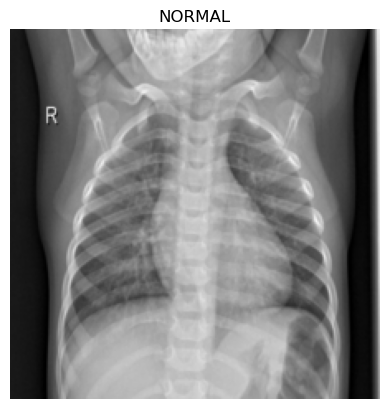

In [10]:
# get image bacth and label Batch

image_batch,label_batch = next(iter(train_dataloader))

# get single image

image,label = image_batch[0],label_batch[0]

# View batch shape

print(image.shape,label)

# visualize the image

plt.imshow(image.permute(1,2,0))
plt.axis(False)
plt.title(class_names[label])

In [11]:
class PatchEmbedding(nn.Module):
    def __init__(self,
                in_channel:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768
                ):
        super().__init__()
        # layer to turn img into patches
        self.patcher = nn.Conv2d(in_channels=in_channel,                          
                                out_channels=embedding_dim,
                                kernel_size=patch_size,
                                stride=patch_size,
                                padding=0)
        # layer to trun patches into 1D
        self.flatten=nn.Flatten(start_dim=2,
                                end_dim=3)

    def forward(self,x):
        img_reso = x.shape[-1]
        assert img_reso%patch_size==0,f'img format unsupported'
        x_patched = self.patcher(x)
        x_flatten = self.flatten(x_patched)

        return x_flatten.permute(0,2,1)
        
        

In [12]:
# test for 1 img
patch_size=16
def set_seed(seed:int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed()

In [13]:
# crt an instance of patchEmbedded layer
patchify = PatchEmbedding(in_channel=3,
                 patch_size=16,
                 embedding_dim=768)

# passing an img
print(f"img shape : {image.unsqueeze(0).shape}")
patch_embedding = patchify(image.unsqueeze(0))
print(f"op of embedding patch shape : {patch_embedding.shape}")

img shape : torch.Size([1, 3, 224, 224])
op of embedding patch shape : torch.Size([1, 196, 768])


In [14]:
print(f"Patch embeddding:\n{patch_embedding}")
print(f"Pstch embedding shape:\n{patch_embedding.shape}")

Patch embeddding:
tensor([[[-0.1951,  0.0759, -0.0018,  ...,  0.0906, -0.0964,  0.0343],
         [-0.4409,  0.1267, -0.1083,  ...,  0.3268, -0.1744,  0.0921],
         [-0.5828,  0.1176, -0.1682,  ...,  0.4038, -0.1747,  0.1660],
         ...,
         [-0.5418,  0.0771, -0.1543,  ...,  0.4049, -0.2171,  0.1719],
         [-0.3009, -0.1018, -0.2156,  ...,  0.3167, -0.0852,  0.3063],
         [-0.2924,  0.1588,  0.0006,  ...,  0.0650, -0.1065,  0.0870]]],
       grad_fn=<PermuteBackward0>)
Pstch embedding shape:
torch.Size([1, 196, 768])


In [15]:
set_seed()
patch_size=16
# orginal img tensor dim
print(f"Image.tensor shape : {image.shape}")
height,width = image.shape[1],image.shape[2]
# tensor  and add batch dim
x=image.unsqueeze(0)
print(f"Image input with batch dim : {x.shape}")

patch_embedding_layer = PatchEmbedding(
                            in_channel=3,
                            patch_size=16,
                            embedding_dim=768)
# pass img throug patch layer
patch_embedding = patch_embedding_layer(x)
print(f"patch_embedding shape : {patch_embedding.shape}")

# creating class tokens
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size,1,embedding_dimension),requires_grad=True)
print(f"Class token embed shape : {class_token.shape}")

# class token embed to patch embed

patch_embedding_class_token = torch.cat((class_token,patch_embedding),dim=1)
print(f"Patch embedding and class tokens cat : {patch_embedding_class_token.shape}")

# crt position embed
no_of_patches = int((height*width)/patch_size**2)
position_embeddding = nn.Parameter(torch.ones(1,no_of_patches+1,embedding_dimension),requires_grad=True)
print(f"Position embedding : {position_embeddding}")

# add position embed with claa and patch embed
patch_and_posotion_embed = patch_embedding_class_token+position_embeddding
print(f"Patch and position embed : {patch_and_posotion_embed}")

Image.tensor shape : torch.Size([3, 224, 224])
Image input with batch dim : torch.Size([1, 3, 224, 224])
patch_embedding shape : torch.Size([1, 196, 768])
Class token embed shape : torch.Size([1, 1, 768])
Patch embedding and class tokens cat : torch.Size([1, 197, 768])
Position embedding : Parameter containing:
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True)
Patch and position embed : tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.8049, 1.0759, 0.9982,  ..., 1.0906, 0.9036, 1.0343],
         [0.5591, 1.1267, 0.8917,  ..., 1.3268, 0.8256, 1.0921],
         ...,
         [0.4582, 1.0771, 0.8457,  ..., 1.4049, 0.7829, 1.1719],
         [0.6991, 0.8982, 0.7844,  ..., 1.3167, 0.9148, 1.3063],
         [0.7076, 1.1588, 1.0006,  ...,

In [16]:
#  Transformer encode

# 1st layer MultiHead Attention Layer

class MultiHeadSelfAttentionBlock(nn.Module):
    def __init__(self,
                embedding_dim:int=768,
                 num_heads:int=12,
                 attn_dropout:float=0          
                ):
        super().__init__()
        # crt Norm layer
        self.layer_norm= nn.LayerNorm(normalized_shape=embedding_dim)

        # crt Multi Head attention Layer
        self.multihead_attn= nn.MultiheadAttention(embed_dim=embedding_dim,
                                                   num_heads=num_heads,
                                                   dropout=attn_dropout,
                                                   batch_first=True)
        
    def forward(self,x):
        x=self.layer_norm(x)
        attn_output , _ = self.multihead_attn(query=x,
                                        key=x,
                                        value=x,
                                        need_weights=False)
        return attn_output

In [17]:
# MLP block
class MLPBlock(nn.Module):
    def __init__(self,
                embedding_dim:int=768,
                 mlp_size:int=3072,
                 drop_out:float=0.1):
        super().__init__()
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=drop_out),
            nn.Linear(in_features=mlp_size,
                      out_features=embedding_dim),
            nn.Dropout(p=drop_out)
        )

    def forward(self,x):
        x=self.layer_norm(x)
        x=self.mlp(x)
        return x

In [18]:
#  Trensformer block

class TransformerEncoderBlock(nn.Module):
    def __init__(self,
                 embedding_dim:int=768,
                 num_heads:int=12,
                 mlp_size:int=3072,
                 mlp_dropout:float=0.1,
                 attn_dropout:float=0):
        super().__init__()

        self.mas_block = MultiHeadSelfAttentionBlock(
                           embedding_dim=embedding_dim,
                           num_heads=num_heads,
                           attn_dropout=attn_dropout)
        self.mlp_block = MLPBlock(
                            embedding_dim=embedding_dim,
                            mlp_size=mlp_size,
                             drop_out=mlp_dropout)
    def forward(self,x):
        x = self.mas_block(x)
        x = self.mlp_block(x)
        return x

In [19]:
# !pip install torchinfo

In [20]:
# testing encoder
import torchinfo
transformer_Encoder = TransformerEncoderBlock()
from torchinfo import summary
summary(model = transformer_Encoder,
        input_size = (1,197,768),
        col_names = ["input_size","output_size","num_params","trainable"],
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape               Output Shape              Param #                   Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]             [1, 197, 768]             --                        True
├─MultiHeadSelfAttentionBlock (mas_block)          [1, 197, 768]             [1, 197, 768]             --                        True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]             [1, 197, 768]             1,536                     True
│    └─MultiheadAttention (multihead_attn)         --                        [1, 197, 768]             2,362,368                 True
├─MLPBlock (mlp_block)                             [1, 197, 768]             [1, 197, 768]             --                        True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]             [1, 197, 768]             1,536                     True
│    └─Sequential (mlp)                            [1, 19

In [27]:
# Building Vision Transformer

class Vit(nn.Module):
    def __init__(self,
                 img_size:int=224,
                 in_channels:int=3,
                 patch_size:int=16,
                 num_transformer_layer:int=12,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 num_heads:int=12,
                 attn_dropout:float=0,
                 mlp_dropout:float=0.1,
                 embedding_dropout:float=0.1,
                 num_classes:int=1000
                ):
        super().__init__()
        assert img_size%patch_size==0,f"image size must be divisible by patch size , imgae size = {img_size} and patch size ={patch_size}"

        self.num_patches = (img_size*img_size)//patch_size**2           # number of patches 

        self.class_embedding = nn.Parameter(data=torch.randn(1,1,embedding_dim),requires_grad=True)       

        self.position_embedding = nn.Parameter(data=torch.randn(1,self.num_patches+1,embedding_dim),requires_grad=True)

        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        self.patch_embedding = PatchEmbedding(
                                in_channel=in_channels,
                                patch_size=patch_size,
                                embedding_dim=embedding_dim)

        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(
                                                    embedding_dim=embedding_dim,
                                                    mlp_size=mlp_size,
                                                    mlp_dropout=mlp_dropout
                                                  ) for _ in range(num_transformer_layer)                                                   
                                                  ])
        self.classifier = nn.Sequential(
                            nn.LayerNorm(normalized_shape = embedding_dim),
                            nn.Linear(in_features = embedding_dim,
                                        out_features = num_classes))

    def forward(self,x):
        
        batch_size = x.shape[0]

        class_token =  self.class_embedding.expand(batch_size,-1,1)

        x = self.patch_embedding(x)

        x = torch.cat((class_token,x),dim=1)

        x = self.position_embedding + x

        x = self.embedding_dropout(x)
                   
        x = self.transformer_encoder(x)

        x = self.classifier(x[:,0])

        return x

In [28]:
vit = Vit(num_classes=len(class_names))

In [39]:
# Model Training
import going_modular

# from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params = vit.parameters(),
                                lr=3e-3,
                                betas = (0.9,0.999),
                                weight_decay = 0.3)

loss_fn = torch.nn.CrossEntropyLoss()

set_seed()

results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)


ModuleNotFoundError: No module named 'going_modular'